In [ ]:
# This reads in time-series data, bins it, and plots both

# Created 2021 Dept. 18 by E.S.

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# read in time-series
photometry_df = pd.read_csv("../junk.csv", index_col="Unnamed: 0")

# read in data with JD info and concatenate to photometry
time_df = pd.read_csv("test_time_series_20210917.csv", usecols=["jd-2459431"])
photometry_df = pd.concat([photometry_df,time_df], axis=1)

In [70]:
def error_bar_noise(data_pts):
    '''
    Generates error bars based on the number of data points in a bin
    
    INPUTS:
    data_pts: the data
    
    OUTPUTS:
    bar_length: the length of the error bar
    '''
    
    bar_length = np.divide(np.std(data_pts),np.sqrt(len(data_pts)))
    
    return bar_length

In [84]:
# configure binning

bin_size = 5*0.00069444444 # 60 sec is 0.00069444444 day
bin_edges = np.arange(start=np.min(time_df["jd-2459431"]),stop=np.max(time_df["jd-2459431"]),step=bin_size)
bin_centers = np.add(0.5*(bin_edges[1]-bin_edges[0]),bin_edges[:-1])
bin_labels = list(map(str,np.arange(0,len(bin_edges)-1)))

In [85]:
# put labels into a new column denoting which ranges of time are in which bin

photometry_df["time_bin"] = pd.cut(photometry_df["jd-2459431"], bins=bin_edges, labels=bin_labels, right=False)

In [86]:
# choose the photometry to use
# (note this is just a string for a column number, not a star number)

col_of_choice = "10"

In [87]:
# make new array of means and error bars
binned_photometry = []
binned_photometry_error_bars = []

for t in range(0,len(bin_labels)):
    
    # extract the datapoints corresponding to that value
    photometry_this_bin = photometry_df[col_of_choice].where(photometry_df["time_bin"] == bin_labels[t]).dropna()
    
    binned_photometry.append(np.mean(photometry_this_bin))
    binned_photometry_error_bars.append(error_bar_noise(photometry_this_bin))

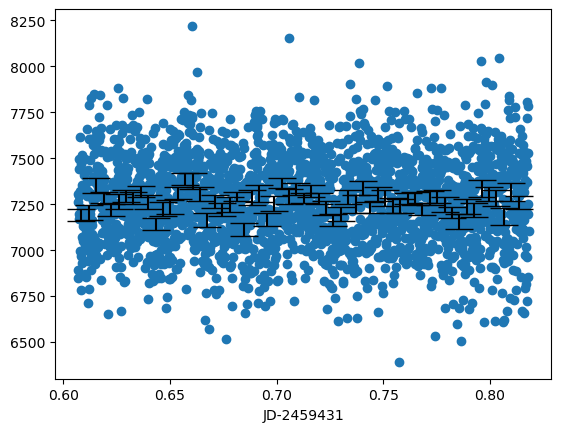

In [88]:
plt.scatter(photometry_df["jd-2459431"],photometry_df[col_of_choice])
plt.errorbar(bin_centers,binned_photometry,yerr=binned_photometry_error_bars,linestyle="",ecolor="k",capsize=10)
plt.xlabel("JD-2459431")
plt.show()